In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import autokeras as ak
import tensorflow as tf

In [2]:
pd.set_option("display.max_columns", None)

# Data Loading and Preprocessing

In [3]:
Max_log_core_ML   = pd.read_csv("core_interval_ML_maxhamish.csv")
Kom_log_core_ML   = pd.read_csv("core_interval_ML_komie.csv")
Adam_log_core_ML  = pd.read_csv("core_interval_ML_mxadam.csv")

In [4]:
Max_log_core_ML

,Top,Bottom,Median,TOC,S1,S2,S3,Tmax,HI,OI,S2/S3,S1/TOC*100,PI,AF10,AF20,AF30,AF60,AF90,AFCO90,AIBD,AIMR,APDC,APDU,APLC,APLU,APSC,APSU,ASFI,AT10,AT20,AT30,AT60,AT90,ATCO90,BS,CFTC,CNTC,DPHI_DOL,DPHI_LIM,DPHI_SAN,DPHZ,DPO,DRH,DSOZ,FPLC,FPMC,FPSC,GDEV,GR,HBHK,HCAL,HCGR,HDAR,HDRA,HFK,HMIN,HMNO,HSGR,HTEM,HTHO,HURA,LCAL,NDPH,NPHI,NPHI_DOL,NPHI_LIM,NPHI_SAN,NPOR,NPOR_DOL,NPOR_LIM,NPOR_SAN,NRHB,PEFL,PEFSA,PEFZ,RHOM,RHOZ,RSOZ,RT,RXOZ,SIGF,SP,SPAR,STOF,TNPH_DOL,TNPH_LIM,TNPH_SAN,DT_C,DT_S,Vp,Vs,AI,SI
0,2955.50,2955.60,2955.550,3.435,0.884,0.364,0.29,NaN,10.60,8.44,1.26,25.74,0.71,33.23335,51.042759,44.47414,49.24054,61.54362,16.248640,172,0.29069,0.13840,0.20750,0.14092,0.21335,0.17725,0.24770,131.60815,21.91610,31.567289,27.61590,28.03596,30.50794,32.778351,172,2626.33081,4334.76855,0.36248,0.31028,0.28520,0.07736,0.08120,7.39849,0.33810,0.02878,0.00552,0.07877,5.28042,116.09825,0.00732,211.70470,36.00708,96.14539,-3.70073,0.00993,28.07024,25.71640,116.59840,120.96652,5.70725,10.17545,222.69038,0.08884,0.15924,0.05057,0.11829,0.15924,0.17440,0.11112,0.12633,0.17440,2503.41113,6.05540,5.54672,5.46458,2516.01294,2522.36133,0.75920,16.01989,69.11242,1.76386,131.8125,131.79195,35.24786,0.09596,0.10910,0.15619,230.74814,365.84201,4333.729407,2733.420364,1.090372e+07,6.877321e+06
1,2965.00,2965.10,2965.050,5.241,0.600,0.210,0.31,NaN,4.01,5.91,0.68,11.45,0.74,19.54336,23.197900,20.89420,19.53114,17.90118,55.862240,172,0.29050,0.06591,0.06602,0.06928,0.06852,0.09730,0.09331,148.91742,15.99467,19.273900,16.78052,17.40743,16.02713,62.394192,172,4761.63477,6518.51563,0.24959,0.18816,0.15863,0.01634,0.02267,-1.07455,0.22742,0.03548,0.01804,0.07111,4.18646,124.28909,0.00732,166.68318,37.81857,96.14539,2.17724,0.00852,222.58278,199.30020,111.79387,121.24614,7.10972,9.59309,167.49304,0.02267,0.12316,0.02891,0.08250,0.12316,0.12886,0.07355,0.08562,0.12886,2612.59033,9.36040,8.31216,7.92001,2612.59033,2623.03589,0.00000,9.99377,32.00840,1.72915,149.1250,149.10399,7.70546,0.06128,0.07121,0.11353,223.99393,348.06396,4464.406692,2873.035174,1.166367e+07,7.506064e+06
2,2965.20,2965.26,2965.230,2.302,0.450,0.180,0.22,304.0,7.82,9.56,0.82,19.55,0.71,17.67740,21.068290,19.01982,17.83189,16.44614,60.804539,172,0.29078,0.08140,0.07869,0.08459,0.08161,0.11489,0.10837,148.97342,18.05801,20.699700,20.41188,19.35070,16.80195,59.516899,172,4609.53271,6448.26074,0.24675,0.18508,0.15544,0.02625,0.03298,-7.75218,0.00000,0.03648,0.01955,0.07327,4.20466,152.03587,0.00732,166.58781,49.16828,96.14539,-8.03065,0.01111,13.23585,11.76429,148.65810,121.24614,9.22814,12.66823,167.79303,0.03298,0.11241,0.02342,0.07184,0.11241,0.13610,0.07944,0.09213,0.13610,2595.58374,10.85875,8.62078,8.15871,2595.58374,2606.68848,0.00000,19.75092,29.68673,1.73172,149.0000,148.98248,5.98807,0.06480,0.07502,0.11791,223.89391,347.22110,4466.401074,2880.009308,1.159292e+07,7.475305e+06
3,2967.50,2967.60,2967.550,4.190,0.270,0.130,0.28,NaN,3.10,6.68,0.46,6.44,0.68,12.83033,13.997880,13.33080,12.62815,12.06271,82.900150,172,0.29061,0.06195,0.07079,0.06547,0.07345,0.09483,0.09902,149.03152,19.62484,22.448250,23.42822,20.11608,20.99506,47.630260,172,4695.30029,6431.30029,0.30755,0.25086,0.22362,0.06515,0.05937,-7.43175,0.41748,0.03150,0.01348,0.06553,4.04773,163.01489,0.00732,166.87398,36.34570,95.57308,-10.22649,0.01065,26.33519,23.46674,156.76990,121.24614,5.39277,15.24708,167.64304,0.05937,0.11261,0.02352,0.07203,0.11261,0.11392,0.06159,0.07157,0.11392,2552.04248,14.87526,8.12508,7.76796,2552.04248,2542.49487,0.17325,20.22478,55.37989,1.58523,149.3750,149.37666,12.48700,0.06139,0.07133,0.11367,231.20744,352.35776,4325.120333,2838.024626,1.103789e+07,7.242759e+06
4,2968.30,2968.37,2968.335,3.604,0.700,0.250,0.24,NaN,6.94,6.66,1.04,19.42,0.74,16.02979,17.607580,16.55340,15.76591,15.29334,65.387940,172,0.29018,0.06477,0.06842,0.06823,0.07100,0.09702,0.09619,151.06253,12.17715,12.609990,12.35491,12.34212,11.64025,85.908840,172,5123.62158,6521.72754,0.23536,0.17276,0.14268,0.08384,0.07631,-8.35121,0.782

In [5]:
Kom_log_core_ML

,TOP,BASE,TOC,S1,S2,S3,TMAX,HI,OI,MEDIAN,PI,BIT,BVOL,CAL,CALX,CALY,CHT,CNCDL,CNCLS,CVOL,DTC,DTS,GR,GRSL,K,KTH,LSD,LSN,M2CC9,M2R1,M2R2,M2R3,M2R6,M2R9,M2RX,MMRK,PE,PE2,PE2QH,PEQH,PZDL,PZDL2,PZLS,PZLS2,PZSS,PZSS2,QCAL,SP,SSN,TEN,TH,TTC,TTEN,TTS,U,ZCOR,ZCOR2,ZDEN,ZDEN2,Vp,Vs,AI,SI
0,2224.50,2224.60,3.12,1.72,1.34,0.10,325,43,3,2224.550,0.562092,200,7.323,198.916,194.212,203.620,3743.137,0.03267,0.10293,4.362,228.249,395.056,72.917,73.490,1.183,30.983,3956.490,2337.860,75.249,13.535,13.419,13.391,13.329,13.289,13.184,0.0,4.601,5.019,5.273,4.601,0.09142,9.133,0.01172,1.162,-0.02422,-2.432,1.006,-3.547,4269.826,-16.371,4.753,932.860,5289.231,1304.234,6.379,27.244,9.078,2689.958,2690.133,4381.180202,2531.286704,1.178519e+07,6.809055e+06
1,2234.00,2234.10,3.09,1.00,1.13,0.08,331,37,3,2234.050,0.469484,200,7.029,198.508,193.435,203.581,3732.896,0.01836,0.08594,4.188,236.718,406.988,141.687,142.790,1.260,36.553,5480.069,2483.947,19.767,68.796,55.729,52.942,52.942,50.588,50.288,0.0,3.233,3.677,3.673,3.254,0.19575,20.309,0.12521,13.319,0.09340,10.167,1.005,-3.569,4190.451,-44.378,4.714,918.642,5301.585,1314.181,14.009,16.719,3.744,2495.897,2482.252,4224.435827,2457.074901,1.054376e+07,6.132606e+06
2,2244.05,2244.15,4.47,1.88,1.83,0.20,333,41,4,2244.100,0.506739,200,6.716,199.217,194.605,203.830,3832.820,0.03054,0.10044,4.003,256.612,422.725,157.344,158.580,1.023,32.822,6200.211,2154.972,185.709,6.396,5.558,5.400,5.384,5.385,5.314,0.0,3.092,3.848,3.898,3.089,0.23356,23.392,0.16632,16.672,0.13601,13.642,1.007,-4.058,3893.724,-17.332,4.835,1002.509,5384.375,1379.143,16.461,14.845,5.449,2425.587,2424.911,3896.933892,2365.604116,9.452352e+06,5.737979e+06
3,2254.43,2254.51,5.26,1.90,1.93,0.10,334,37,2,2254.470,0.496084,200,6.394,199.315,194.266,204.364,3832.884,0.05048,0.12328,3.811,270.115,426.123,168.638,169.930,1.537,45.618,5904.471,1791.313,51.030,15.199,18.807,19.393,19.484,19.596,19.097,0.0,3.408,4.169,4.280,3.423,0.22894,21.470,0.16130,14.581,0.13080,11.475,1.007,-3.324,3563.020,3.628,6.239,1054.480,5388.378,1439.379,16.527,8.714,13.732,2434.179,2460.661,3702.126872,2346.740260,9.011639e+06,5.712386e+06
4,2264.50,2264.60,0.34,0.09,0.16,0.27,328,46,80,2264.550,0.360000,200,6.078,200.098,193.949,206.247,3801.630,0.10294,0.17903,3.624,254.955,464.568,88.822,89.465,3.079,89.071,3835.543,1247.839,114.804,10.116,9.445,9.106,8.835,8.711,8.618,1.0,4.526,5.876,5.780,4.339,0.07714,8.259,-0.00381,0.211,-0.04032,-3.417,1.004,-3.504,3005.245,-3.132,12.765,951.226,5376.622,1423.043,0.054,-0.150,-8.085,2716.521,2706.384,3922.260791,2152.537411,1.065490e+07,5.847413e+06
5,2274.00,2274.10,1.40,0.42,0.53,0.12,314,38,9,2274.050,0.442105,200,5.777,199.498,193.536,205.460,3799.615,0.09538,0.17132,3.444,278.615,473.422,143.711,144.792,2.362,68.904,5331.375,1300.540,85.580,14.752,13.154,12.506,12.013,11.685,11.515,0.0,4.076,4.670,4.623,4.123,0.19137,20.472,0.12044,13.496,0.08845,10.351,1.004,-3.360,3058.312,-1.547,8.665,1005.291,5386.098,1447.940,9.880,12.540,5.642,2504.054,2479.212,3589.182205,2112.280376,8.987506e+06,5.289264e+06
6,2284.60,2284.69,0.43,0.08,0.07,0.16,330,16,37,2284.645,0.533333,200,5.447,200.167,194.323,206.010,3811.072,0.12264,0.19872,3.247,257.399,480.042,99.453,100.248,3.417,94.964,3914.169,1092.124,112.610,11.153,10.024,9.497,9.070,8.880,8.642,0.0,4.805,5.786,5.603,4.697,0.08610,9.953,0.00593,2.054,-0.03021,-1.508,1.004,-3.493,2780.522,-25.836,12.702,978.743,5396.440,1557.754,0.725,7.225,-9.444,2699.854,2674.883,3885.018978,2083.151058,1.048898e+07,5.624204e+06
7,2294.50,2294.60,0.46,0.04,0.05,0.18,338,11,39,2294.550,0.444444,200,5.135,199.938,194.550,205.326,3795.691,0.11997,0.19609,3.061,249.016,460.350,90.156,90.837,2.921,84.856,3837.094,1130.326,98.813,12.554,11.383,10.855,10.384,10.120,9.951,0.0,5.161,6.046,5.900,5.173,0.08549,8.066,0.00527,0.001,-0.03090,-3.635,1.004,-3.656,2856.742,-41.502,12.034,927.656,5400.090,1456.980,0.817,-0.823,-1.085,2700.984,2709.975,4015.806213,2172.260237,1.084663e+07,5.867240e+06
8,2304.49,2304.59,0.93,

In [6]:
Adam_log_core_ML

,Top(depth),Bottom(depth),HI,OI,S1,S2,S3,TMAX,MEDIAN,Top(depth_m),Bottom(depth_m),TOC_from_HI,TOC_from_OI,TOC,PI,~A,HDRA2,CDF,DSOZ,ECGR,FCD,GDEV,HTEM,ICV,IHV,RLA3,RLA5,RXO_HRLT,SP,TENS,DPHI_DOL,DPHI_DOL2,DPHI_LIM,DPHI_LIM2,DPHI_SAN,DPHI_SAN2,HDRA,NPOR_DOL,NPOR_LIM,NPOR_SAN,PEFZ,PEFZ2,RHOZ,RHOZ2,DT1R,DTRS,DTTP,DTTS,GR,HCAL,HCAL2,VPVS,DTRP,AF20,AF30,AF90,AFCO90,AMF,CDF.1,GR_EDTC,HTPR,HTUR,HUPR,CS,DWAL_WALK2,DWCA_WALK2,DWFE_WALK2,DWSI_WALK2,DWSU_WALK2,DWTI_WALK2,DXFE_WALK2,HTPR.1,HTUR.1,HUPR.1,RHGE_WALK2,WANH_WALK2,WCAR_WALK2,WCLA_WALK2,WCOA_WALK2,WEVA_WALK2,WPYR_WALK2,WQFM_WALK2,WSID_WALK2,CCA_WALK2,CCHL_WALK2,CFE_WALK2,CGD_WALK2,CHY_WALK2,CSI_WALK2,CSUL_WALK2,CTI_WALK2,ECMG_20,ECST,EOCF_20,ERDF_20,ESSR_20,ESUF_WALK2,FY2W_WALK2,IC_WALK2,HCGR,HFK,HSGR,HTHO,HURA,DTCO3,DTSH5,EHD1_PPC1,EHD2_PPC1,HD1_PPC1,HD2_PPC1,PR,RD1_PPC1,RD2_PPC1,RD3_PPC1,RD4_PPC1,DCSI3,DTSH3,HDAR,SPHI,SPJ3[0],TKO_SFA3[0],DCSI4,DTST,SPJ4[0],TKO_SFA4[0],DCSI5,SPJ5[0],TKO_SFA5[0],DCSI6,DTSH6,SPJ6[0],TKO_SFA6[0],Vp_DTTP,Vp_DTRP,Vs_DTTS,Vs_DTRS,Vp_lower,Vs_lower,Vp,Vs,AI,SI
0,2719.59,2719.68,46.0,22.0,1.21,1.19,0.56,367.0,2719.635,828.931032,828.958464,2.586957,2.545455,2.566206,0.504167,NaN,2.6674,NaN,0.1910,147.6092,139.7,1.7149,125.4404,3.1835,6.2809,NaN,NaN,NaN,NaN,4398.0,0.1085,0.1088,0.0355,0.0358,0.0004,0.0008,-1.4873,0.1699,0.1917,0.2435,4.9070,5.1485,2649.3364,2648.7148,NaN,NaN,NaN,NaN,NaN,223.1348,222.0053,NaN,NaN,4.5091,4.6805,4.4414,225.1544,39.5070,7716.9531,122.3500,3.6174,1.4108,2.5640,1479.0,0.0817,0.0000,0.0482,0.3222,0.0001,0.0044,0.0,3.6174,1.4108,2.5640,2731.8814,0.0,0.0000,0.5329,0.0,0.0,0.0002,0.4670,0.0,-0.0129,0.3017,0.0865,0.1591,0.1203,0.0931,0.0092,0.0311,0.9988,9.7239,-0.4561,4.1288,12852.9531,1.0445,3.2784,0.0111,73.1374,0.0248,122.2115,8.9519,6.3451,275.1318,471.7178,226.7519,226.4465,226.7458,226.4437,0.2422,119.7805,119.7099,118.6664,121.3317,0.0,479.3388,226.5992,0.2076,0.0840,0.0000,0.0,953.7056,0.1192,0.4461,0.0,0.1400,0.4080,0.0,473.5902,0.1717,0.4178,NaN,NaN,NaN,NaN,NaN,NaN,3634.621661,2111.530179,9.629335e+06,5.594154e+06
1,2730.44,2730.54,49.0,23.0,1.31,1.28,0.60,362.0,2730.490,832.238112,832.268592,2.612245,2.608696,2.610470,0.505792,NaN,1.6692,NaN,1.5484,150.7070,139.7,1.8432,125.7200,3.0022,5.9337,NaN,NaN,NaN,NaN,4356.0,0.1307,0.1231,0.0596,0.0513,0.0254,0.0168,-6.8824,0.1060,0.1202,0.1684,4.1628,4.0261,2608.1497,2622.2856,NaN,NaN,NaN,NaN,NaN,197.3348,200.2060,NaN,NaN,18.2003,18.3220,17.0462,58.6642,39.6898,7522.4478,136.4835,5.0784,1.0870,4.6719,1491.0,0.0561,0.0221,0.0331,0.3419,0.0027,0.0020,0.0,5.0784,1.0870,4.6719,2711.0208,0.0,0.0000,0.3080,0.0,0.0,0.0051,0.6869,0.0,0.0125,0.2567,0.0733,0.0738,0.1234,0.1408,-0.0022,0.0156,0.9986,9.0736,-0.3958,4.4568,13316.0000,0.7791,2.4595,0.0059,59.9146,0.0176,122.2424,8.9172,8.2034,252.9087,410.4936,202.1893,201.5865,202.1822,201.5861,0.1941,107.2988,107.5341,106.8954,109.1873,0.0,407.8603,201.8881,0.1710,0.1260,0.8641,0.0,972.5871,0.1234,0.4363,0.0,0.4742,0.0000,0.0,404.5085,0.4136,0.3081,NaN,NaN,NaN,NaN,NaN,NaN,3953.996047,2472.135938,1.031261e+07,6.447701e+06
2,2744.58,2744.67,36.0,15.0,2.41,1.51,0.62,370.0,2744.625,836.547984,836.575416,4.194444,4.133333,4.163889,0.614796,NaN,2.5339,NaN,0.6021,125.6950,139.7,0.8923,125.7200,2.7791,5.4934,NaN,NaN,NaN,NaN,4371.0,0.1433,0.1362,0.0732,0.0654,0.0395,0.0315,-4.3940,0.0550,0.0644,0.1057,3.7530,3.5613,2584.8320,2598.0757,NaN,NaN,NaN,NaN,NaN,197.3348,200.5818,NaN,NaN,32.6984,33.9310,32.0604,31.1912,39.9006,7457.6128,105.1134,5.4339,0.7423,7.3207,1475.0,0.0372,0.0000,0.0223,0.4010,0.0068,0.0008,0.0,5.4339,0.7423,7.3207,2692.2173,0.0,0.0000,0.1418,0.0,0.0,0.0128,0.8455,0.0,-0.0015,0.2684,0.0577,0.1365,0.1173,0.1777,0.0046,0.0064,0.9991,9.0736,-0.3867,4.2049,14765.0000,0.6415,2.2350,0.0141,37.9334,0.0108,98.9556,5.8507,7.8821,230.2803,383.1942,202.4550,201.4524,202.4478,201.4523,0.2174,107.2722,107.4687,107.1842,109.1218,0.0,366.1112,201.9542,0.1264,0.0900,0.8655,0.0,996.1976,0.1110,0.1811,0.0,0.3013,0.4200,0.0,378.4580,0.5256,0.3932,NaN,N

In [7]:
# Max = Max_log_core_ML.filter(['S1', 'S2', 'S3', 'HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN'
#                               ,'NPHI_DOL','NPHI_LIM','NPHI_SAN','NPOR_DOL','NPOR_LIM','NPOR_SAN'
#                               ,'HBHK','HURA','HTHO','RHOM','Vp','Vs','AI','SI','TOC'])
# Max = Max_log_core_ML.filter(['S1', 'S2', 'S3', 'HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN'
#                               ,'NPHI_DOL','NPHI_LIM','HBHK','HURA','HTHO','RHOM','GR','Vp','Vs','AI','SI','TOC'])

# HBHK excluded since lots of NaN value in the core sample interval
Max = Max_log_core_ML.filter(['Median','S1', 'S2', 'S3', 'HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN'
                              ,'NPHI_DOL','NPHI_LIM','HURA','HTHO','RHOM','GR','Vp','Vs','AI','SI','TOC'])
Max = Max.dropna()
Max['Well'] = 'Maxhamish'
Max.rename(columns={"Median" : "MEDIAN","HURA": "U", "HTHO": "TH", "RHOM" : "RhoB", }, inplace=True)
Max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEDIAN    85 non-null     float64
 1   S1        85 non-null     float64
 2   S2        85 non-null     float64
 3   S3        85 non-null     float64
 4   HI        85 non-null     float64
 5   OI        85 non-null     float64
 6   PI        85 non-null     float64
 7   DPHI_DOL  85 non-null     float64
 8   DPHI_LIM  85 non-null     float64
 9   DPHI_SAN  85 non-null     float64
 10  NPHI_DOL  85 non-null     float64
 11  NPHI_LIM  85 non-null     float64
 12  U         85 non-null     float64
 13  TH        85 non-null     float64
 14  RhoB      85 non-null     float64
 15  GR        85 non-null     float64
 16  Vp        85 non-null     float64
 17  Vs        85 non-null     float64
 18  AI        85 non-null     float64
 19  SI        85 non-null     float64
 20  TOC       85 non-null     float64


In [8]:
# Max.isnull().any()
# Max.isna().sum()

In [9]:
# Kom = Kom_log_core_ML.filter(['S1','S2','S3','HI','OI','PI','PZDL','PZLS','PZSS',
#                              'CNCDL','CNCLS','K','U', 'TH','ZDEN','GR','Vp','Vs','AI','SI','TOC'])
Kom = Kom_log_core_ML.filter(['MEDIAN','S1','S2','S3','HI','OI','PI','PZDL','PZLS','PZSS',
                             'CNCDL','CNCLS','U', 'TH','ZDEN','GR','Vp','Vs','AI','SI','TOC'])
Kom = Kom.dropna()
Kom['Well'] = 'Komie'
Kom.rename(columns={"PZDL": "DPHI_DOL", "PZLS": "DPHI_LIM", "PZSS" : "DPHI_SAN",
                    "CNCDL" : "NPHI_DOL", "CNCLS" : "NPHI_LIM", "ZDEN" : "RhoB",}, inplace=True)
Kom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEDIAN    17 non-null     float64
 1   S1        17 non-null     float64
 2   S2        17 non-null     float64
 3   S3        17 non-null     float64
 4   HI        17 non-null     int64  
 5   OI        17 non-null     int64  
 6   PI        17 non-null     float64
 7   DPHI_DOL  17 non-null     float64
 8   DPHI_LIM  17 non-null     float64
 9   DPHI_SAN  17 non-null     float64
 10  NPHI_DOL  17 non-null     float64
 11  NPHI_LIM  17 non-null     float64
 12  U         17 non-null     float64
 13  TH        17 non-null     float64
 14  RhoB      17 non-null     float64
 15  GR        17 non-null     float64
 16  Vp        17 non-null     float64
 17  Vs        17 non-null     float64
 18  AI        17 non-null     float64
 19  SI        17 non-null     float64
 20  TOC       17 non-null     float64


In [10]:
# Kom.isna().sum()

In [11]:
# Adam = Adam_log_core_ML.filter(['S1','S2','S3','HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN',
#                                'NPOR_DOL','NPOR_LIM','NPOR_SAN','HFK','HURA','HTHO','ECGR','Vp','Vs','AI','SI','TOC'])
Adam = Adam_log_core_ML.filter(['MEDIAN','S1','S2','S3','HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN',
                               'NPOR_DOL','NPOR_LIM','HURA','HTHO','RHOZ','ECGR','Vp','Vs','AI','SI','TOC'])
Adam = Adam.dropna()
Adam['Well'] = 'MxAdam'
Adam.rename(columns={"NPOR_DOL" : "NPHI_DOL", "NPOR_LIM" : "NPHI_LIM", "HURA" : "U", "HTHO" : "TH","RHOZ" : "RhoB" , "ECGR" : "GR"}, inplace=True)

Adam

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2719.635,1.21,1.19,0.56,46.0,22.0,0.504167,0.1085,0.0355,0.0004,0.1699,0.1917,6.3451,8.9519,2649.3364,147.6092,3634.621661,2111.530179,9.629335e+06,5.594154e+06,2.566206,MxAdam
1,2730.490,1.31,1.28,0.60,49.0,23.0,0.505792,0.1307,0.0596,0.0254,0.1060,0.1202,8.2034,8.9172,2608.1497,150.7070,3953.996047,2472.135938,1.031261e+07,6.447701e+06,2.610470,MxAdam
2,2744.625,2.41,1.51,0.62,36.0,15.0,0.614796,0.1433,0.0732,0.0395,0.0550,0.0644,7.8821,5.8507,2584.8320,125.6950,4342.533860,2642.301127,1.122472e+07,6.829905e+06,4.163889,MxAdam
3,2755.845,0.92,0.75,0.44,20.0,12.0,0.550898,0.1754,0.1079,0.0755,0.0679,0.0781,19.9152,7.7951,2525.4788,233.4248,4013.859053,2419.537670,1.013692e+07,6.110491e+06,3.708333,MxAdam
4,2766.620,0.71,0.62,0.32,17.0,9.0,0.533835,0.2028,0.1375,0.1062,0.0874,0.0996,16.7217,7.8286,2474.8040,204.8335,3900.449605,2497.567369,9.652848e+06,6.180990e+06,3.601307,MxAdam
5,2775.660,3.15,1.38,0.54,47.0,18.0,0.695364,0.1763,0.1088,0.0764,0.0702,0.0812,9.4899,6.0992,2523.9002,138.4164,3982.048923,2490.230824,1.005029e+07,6.285094e+06,2.968085,MxAdam
6,2786.180,0.54,0.53,0.27,14.0,7.0,0.504673,0.1675,0.0993,0.0666,0.1518,0.1713,16.1661,9.3072,2540.1506,187.0911,3619.482371,2237.216044,9.194030e+06,5.682866e+06,3.821429,MxAdam
7,2796.370,0.71,0.53,0.53,123.0,123.0,0.572581,0.0398,-0.0388,-0.0766,0.1250,0.1414,1.6146,9.9950,2776.3481,107.1218,4289.936196,2405.700162,1.191036e+07,6.679061e+06,0.430894,MxAdam
8,2813.800,0.53,0.36,0.46,31.0,39.0,0.595506,0.0868,0.0120,-0.0239,0.1144,0.1295,2.7682,9.9455,2689.3870,120.8134,4065.435626,2306.546486,1.093353e+07,6.203196e+06,1.170389,MxAdam
9,2824.295,0.75,0.43,0.34,45.0,36.0,0.635593,0.0652,-0.0114,-0.0482,0.0375,0.0451,1.1134,4.0273,2729.4438,51.5486,5121.956341,2879.384871,1.398009e+07,7.859119e+06,0.950000,MxAdam


In [12]:
# Adam.isna().sum()

In [13]:
all_data = pd.concat([Max, Kom, Adam], axis=0)
all_data.reset_index(inplace=True, drop=True)
all_data

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2955.550,0.884,0.364,0.29,10.60,8.44,0.710000,0.36248,0.31028,0.28520,0.05057,0.11829,10.17545,5.70725,2516.01294,116.09825,4333.729407,2733.420364,1.090372e+07,6.877321e+06,3.435000,Maxhamish
1,2965.050,0.600,0.210,0.31,4.01,5.91,0.740000,0.24959,0.18816,0.15863,0.02891,0.08250,9.59309,7.10972,2612.59033,124.28909,4464.406692,2873.035174,1.166367e+07,7.506064e+06,5.241000,Maxhamish
2,2965.230,0.450,0.180,0.22,7.82,9.56,0.710000,0.24675,0.18508,0.15544,0.02342,0.07184,12.66823,9.22814,2595.58374,152.03587,4466.401074,2880.009308,1.159292e+07,7.475305e+06,2.302000,Maxhamish
3,2967.550,0.270,0.130,0.28,3.10,6.68,0.680000,0.30755,0.25086,0.22362,0.02352,0.07203,15.24708,5.39277,2552.04248,163.01489,4325.120333,2838.024626,1.103789e+07,7.242759e+06,4.190000,Maxhamish
4,2968.335,0.700,0.250,0.24,6.94,6.66,0.740000,0.23536,0.17276,0.14268,0.01959,0.06391,13.70019,4.27096,2524.09375,134.20711,4278.771185,2829.864500,1.080002e+07,7.142843e+06,3.604000,Maxhamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2874.545,1.380,1.100,0.54,27.00,13.00,0.556452,0.21380,0.14940,0.11850,0.05560,0.06490,20.47120,4.39640,2454.45260,204.05220,4281.129807,2719.506312,1.050783e+07,6.674899e+06,4.113960,MxAdam
117,2884.395,4.640,2.230,0.89,44.00,17.00,0.675400,0.18420,0.11740,0.08540,0.07080,0.08140,18.60500,6.06090,2509.17750,205.67890,4225.983629,2677.545355,1.060374e+07,6.718437e+06,5.151738,MxAdam
118,2897.640,5.320,2.200,0.58,32.00,8.00,0.707447,0.22380,0.16020,0.12970,0.08140,0.09340,29.36250,2.50030,2435.99880,278.85720,4114.877504,2623.296923,1.002384e+07,6.390348e+06,7.062500,MxAdam
119,2908.700,1.140,1.020,0.53,22.00,11.00,0.527778,0.17580,0.10840,0.07590,0.04310,0.05100,22.27600,2.65850,2524.72480,206.59040,4527.152503,2803.626435,1.142981e+07,7.078385e+06,4.727273,MxAdam


In [14]:
feature_vectors = all_data.drop(['TOC','Well','MEDIAN'], axis=1)
label_vectors   = all_data.filter(['TOC'])
well_vectors    = all_data.filter(['Well'])
depth_vectors   = all_data.filter(['MEDIAN'])

In [15]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [16]:
# MinMax Scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(feature_vectors)

In [17]:
df_scaled_features = pd.DataFrame(scaled_features, columns = ['S1', 'S2', 'S3', 'HI','OI','PI',
                                                                          'DPHI_DOL','DPHI_LIM','DPHI_SAN','NPHI_DOL',
                                                                          'NPHI_LIM','U','TH','RhoB','GR','Vp','Vs',
                                                                          'AI','SI'])
scaled_features_with_well_name = pd.concat([depth_vectors,df_scaled_features, label_vectors, well_vectors], axis = 1)
scaled_features_with_well_name

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2955.550,0.081823,-0.187760,0.090579,-0.389571,-0.234642,0.646635,3.299389,3.288026,3.287930,0.046155,0.446326,-0.213069,-0.108343,-0.496297,-0.455546,0.278681,0.352842,0.079076,0.166379,3.435000,Maxhamish
1,2965.050,-0.258131,-0.511526,0.250346,-0.622547,-0.267001,0.927204,1.254252,1.257272,1.257070,-0.566234,-0.409718,-0.295716,0.424756,0.663353,-0.292872,0.609132,0.933728,0.720211,1.150099,5.241000,Maxhamish
2,2965.230,-0.437685,-0.574597,-0.468607,-0.487852,-0.220318,0.646635,1.202802,1.206055,1.205885,-0.721451,-0.664690,0.140697,1.229997,0.459147,0.258192,0.614175,0.962745,0.660524,1.101975,2.302000,Maxhamish
3,2967.550,-0.653149,-0.679716,0.010695,-0.654718,-0.257153,0.366065,2.304267,2.299921,2.299857,-0.718624,-0.660145,0.506679,-0.227882,-0.063673,0.476241,0.256910,0.788062,0.192271,0.738138,4.190000,Maxhamish
4,2968.335,-0.138429,-0.427431,-0.308840,-0.518963,-0.257408,0.927204,0.996459,1.001183,1.001147,-0.829736,-0.854364,0.287150,-0.654298,-0.399267,-0.095896,0.139705,0.754111,-0.008411,0.581811,3.604000,Maxhamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2874.545,0.675546,1.359590,2.087673,0.190216,-0.176321,-0.789399,0.605874,0.612726,0.613170,0.188367,-0.830684,1.248068,-0.606616,-1.235480,1.291261,0.145669,0.294951,-0.254919,-0.150326,4.113960,MxAdam
117,2884.395,4.577837,3.735276,4.883605,0.791215,-0.125162,0.323047,0.069635,0.080592,0.082069,0.618113,-0.436029,0.983223,0.026084,-0.578373,1.323568,0.006218,0.120367,-0.174001,-0.082208,5.151738,MxAdam
118,2897.640,5.391812,3.672205,2.407208,0.366980,-0.240270,0.622757,0.787036,0.792321,0.792878,0.917805,-0.149006,2.509890,-1.327351,-1.457064,2.776924,-0.274743,-0.105341,-0.663244,-0.595530,7.062500,MxAdam
119,2908.700,0.388261,1.191400,2.007789,0.013452,-0.201900,-1.057566,-0.082541,-0.069070,-0.070362,-0.165043,-1.163152,1.504198,-1.267217,-0.391689,1.341671,0.767801,0.644944,0.522920,0.480961,4.727273,MxAdam


In [18]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted, filename):  
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(filename)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('___________________')
    
def evaluate(true, predicted):
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return rmse, r2_square

In [19]:
blind = scaled_features_with_well_name[scaled_features_with_well_name['Well'] == 'MxAdam']
training_data = scaled_features_with_well_name[scaled_features_with_well_name['Well'] != 'MxAdam']

In [20]:
blind_complete = blind

In [21]:
blind_with_well = blind['MEDIAN']
blind_toc = blind['TOC']
blind = blind.drop(['TOC','Well','MEDIAN'],axis=1)

In [22]:
from sklearn.model_selection import train_test_split
x = training_data.drop(['TOC','Well','MEDIAN'],axis=1)
y = training_data['TOC']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 123)

# Results comparison

In [23]:
def plot_well_1(filename, blind_what, load_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing):
    load_data = pd.read_csv(filename)
    plt.plot(blind_complete[blind_what],blind_complete['MEDIAN'],'bo',label=label_1)
    plt.plot(load_data[load_what],blind_complete['MEDIAN'],'-', color='orange',label=label_2)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='lower right')
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(27, 12)
    
    print_evaluate(blind_complete[blind_what], load_data[load_what], filename)

In [24]:
def plot_well_2(filename, blind_what, load_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing):
    load_data = pd.read_csv(filename)
    plt.plot(blind_complete[blind_what],blind_complete['MEDIAN'],'bo',label=label_1)
    plt.plot(load_data[load_what],blind_complete['MEDIAN'],'-o', color='orange',label=label_2)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='lower right')
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(27, 12)
    
    print_evaluate(blind_complete[blind_what], load_data[load_what], filename)

TOC_Pred_McAdam_CONV_rerun.csv
RMSE: 2.3296844067623375
R2 Square -0.7562150131358469
___________________
TOC_Pred_McAdam_CONV_rerun.csv
RMSE: 1.3366788512897883
R2 Square 0.4218538295303784
___________________
TOC_Pred_McAdam_CONV_rerun.csv
RMSE: 1.3656157350253106
R2 Square 0.39655106637665083
___________________
TOC_Pred_McAdam_FF1_FF2_rerun.csv
RMSE: 2.612058252147799
R2 Square -1.2077465552002908
___________________
TOC_Pred_McAdam_FF1_FF2_rerun.csv
RMSE: 1.6393645387018663
R2 Square 0.13036988079645762
___________________
TOC_Pred_McAdam_FF3_FF4_rerun.csv
RMSE: 2.6120582791205647
R2 Square -1.2077466007957751
___________________
TOC_Pred_McAdam_FF3_FF4_rerun.csv
RMSE: 1.2468110371499315
R2 Square 0.49698055232565996
___________________
TOC_Pred_McAdam_CNN2_rerun.csv
RMSE: 1.5238624987001423
R2 Square 0.24859330081752462
___________________
TOC_Pred_McAdam_CNN4_rerun.csv
RMSE: 1.5758223190693565
R2 Square 0.19647758864172304
___________________
TOC_Pred_McAdam_CNN1_rerun.csv
RMSE:

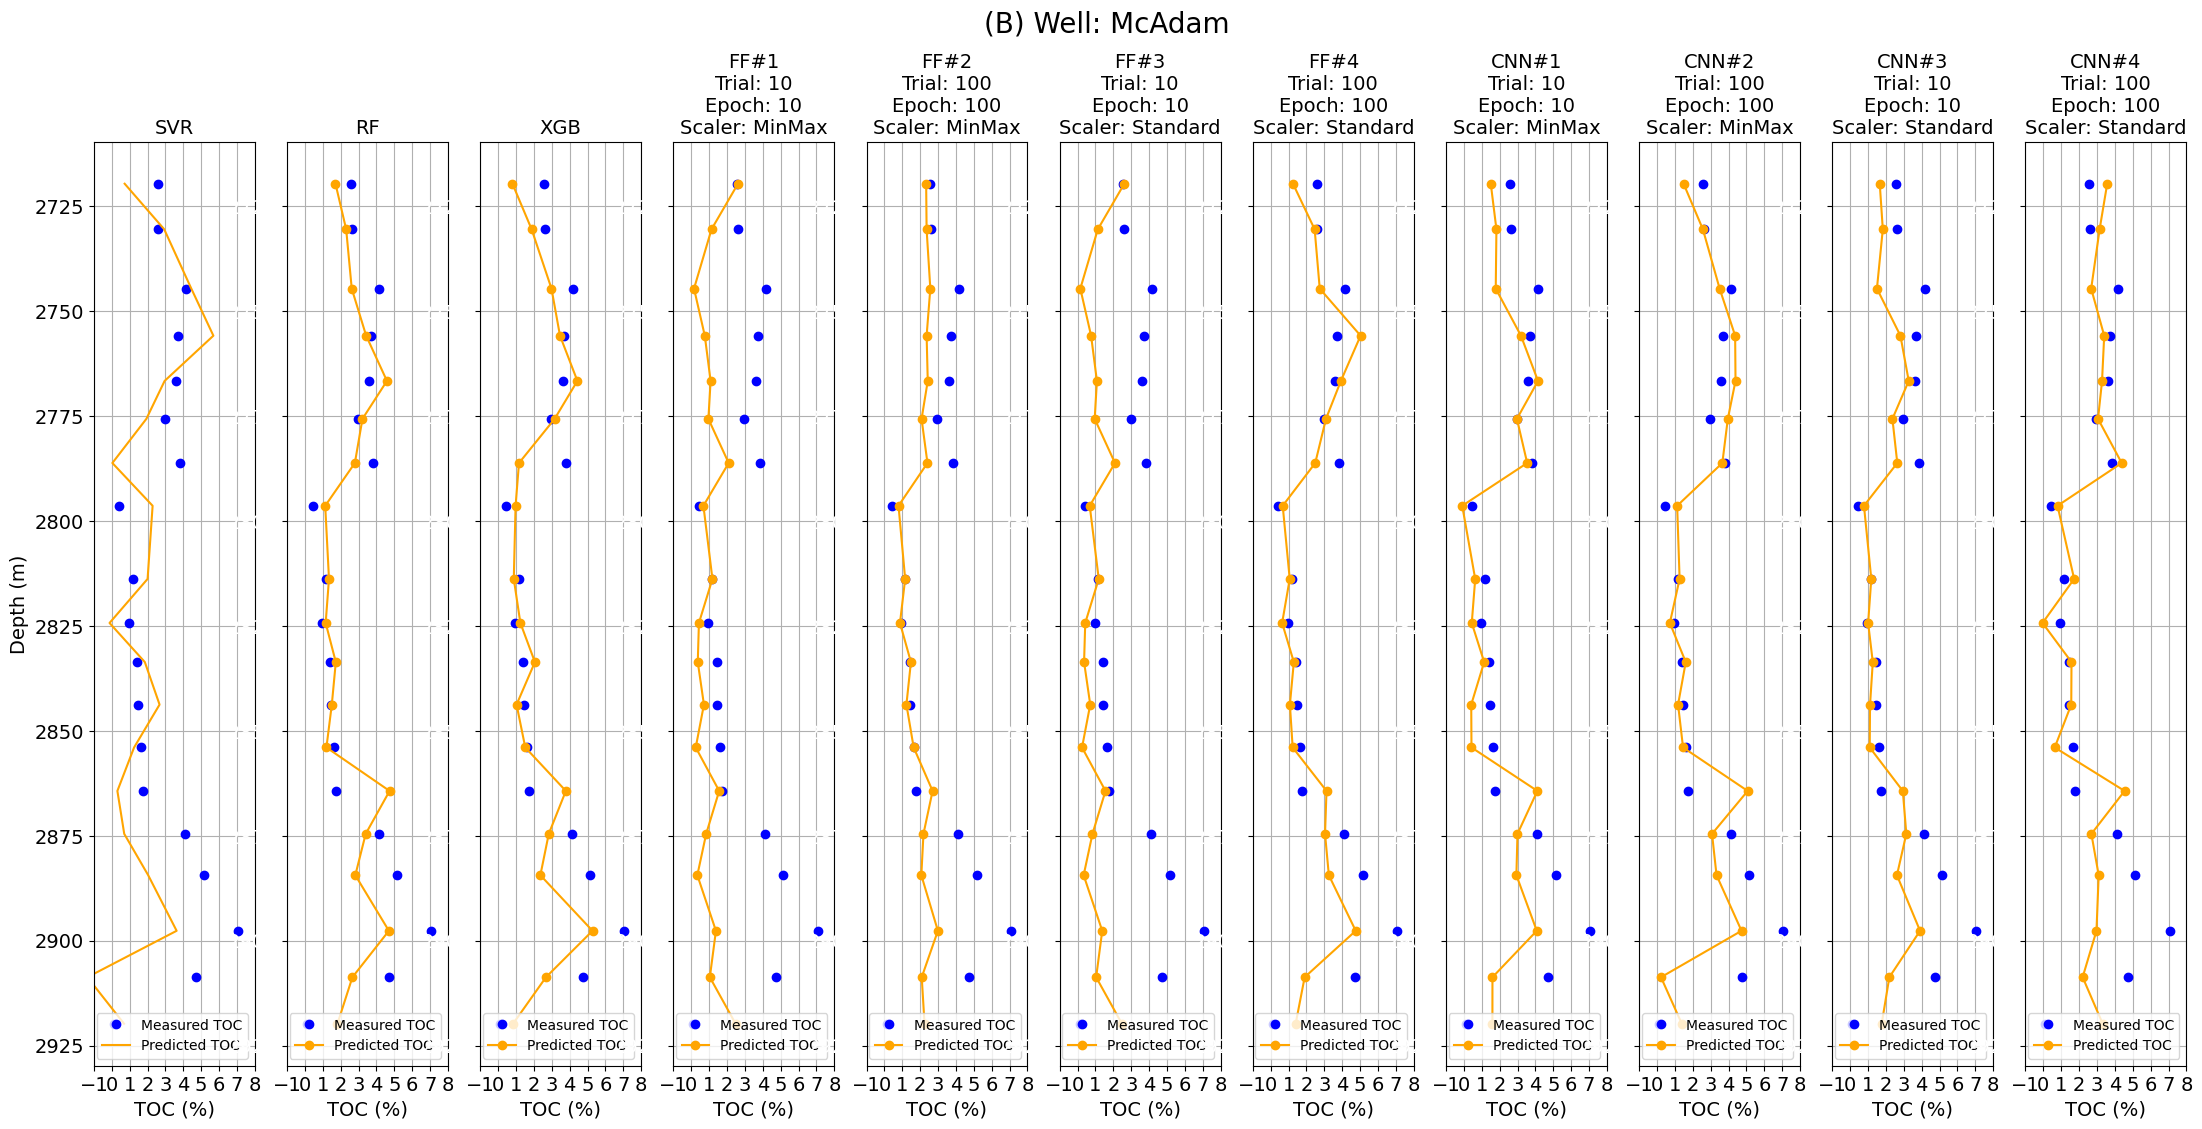

In [25]:
x = 11
font_size = 14

Obj       = 'TOC'
Meas      = 'Measured TOC'
Pred      = 'Predicted TOC'
x_lbl     = 'TOC (%)'
x_low     = -1
x_up      = 7.5
x_spacing = 1

fig, ax = plt.subplots(1, x)
plt.subplot(1, x, 1)
plot_well_1('TOC_Pred_McAdam_CONV_rerun.csv', Obj, 'TOC_SVM', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[0].set_title("SVR", fontsize=font_size)

plt.subplot(1, x, 2)
plot_well_2('TOC_Pred_McAdam_CONV_rerun.csv', Obj, 'TOC_RF', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[1].set_title("RF", fontsize=font_size)

plt.subplot(1, x, 3)
plot_well_2('TOC_Pred_McAdam_CONV_rerun.csv', Obj, 'TOC_XGB', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[2].set_title("XGB", fontsize=font_size)

plt.subplot(1, x, 4)
plot_well_2('TOC_Pred_McAdam_FF1_FF2_rerun.csv', Obj, 'TOC_FF1', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[3].set_title("FF#1\nTrial: 10\nEpoch: 10\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 5)
plot_well_2('TOC_Pred_McAdam_FF1_FF2_rerun.csv', Obj, 'TOC_FF2', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[4].set_title("FF#2\nTrial: 100\nEpoch: 100\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 6)
plot_well_2('TOC_Pred_McAdam_FF3_FF4_rerun.csv', Obj, 'TOC_FF3', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[5].set_title("FF#3\nTrial: 10\nEpoch: 10\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 7)
plot_well_2('TOC_Pred_McAdam_FF3_FF4_rerun.csv', Obj, 'TOC_FF4', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[6].set_title("FF#4\nTrial: 100\nEpoch: 100\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 8)
plot_well_2('TOC_Pred_McAdam_CNN2_rerun.csv', Obj, 'TOC_CNN2', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[7].set_title("CNN#1\nTrial: 10\nEpoch: 10\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 9)
plot_well_2('TOC_Pred_McAdam_CNN4_rerun.csv', Obj, 'TOC_CNN4', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[8].set_title("CNN#2\nTrial: 100\nEpoch: 100\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 10)
plot_well_2('TOC_Pred_McAdam_CNN1_rerun.csv', Obj, 'TOC_CNN1', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[9].set_title("CNN#3\nTrial: 10\nEpoch: 10\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 11)
plot_well_2('TOC_Pred_McAdam_CNN3_rerun.csv', Obj, 'TOC_CNN3', Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[10].set_title("CNN#4\nTrial: 100\nEpoch: 100\nScaler: Standard", fontsize=font_size)

plt.suptitle('(B) Well: McAdam', fontsize=20, y=0.99)
plt.savefig('McAdam_TOC_rerun.png', format='png', dpi=300)

In [26]:
import statistics

def accu_and_pearson(filename, predicted, measured):
    load_data = pd.read_csv(filename)

    s     = load_data[predicted] / load_data[measured]
    Error = (abs(1 - s)/1) * 100
    Error = statistics.mean(Error)
    
    # Pearson's coefficient correlation
    Pearson = np.corrcoef(load_data[predicted], load_data[measured])
#     print('Average Error =',Error)
    print('Pearson       =',Pearson[1,0])
#     print(pred)
#     print(meas)
#     print(np.divide(pred,meas))

In [27]:
accu_and_pearson('TOC_Pred_McAdam_CONV_rerun.csv', 'TOC_SVM', 'TOC_meas')

Pearson       = 0.237640319462907


In [28]:
accu_and_pearson('TOC_Pred_McAdam_CONV_rerun.csv', 'TOC_RF', 'TOC_meas')

Pearson       = 0.6638557043103033


In [29]:
accu_and_pearson('TOC_Pred_McAdam_CONV_rerun.csv', 'TOC_XGB', 'TOC_meas')

Pearson       = 0.6985579058887641


In [30]:
accu_and_pearson('TOC_Pred_McAdam_FF1_FF2_rerun.csv', 'TOC_FF1', 'TOC')

Pearson       = -0.06827571177169965


In [31]:
accu_and_pearson('TOC_Pred_McAdam_FF1_FF2_rerun.csv', 'TOC_FF2', 'TOC')

Pearson       = 0.6696734971707611


In [32]:
accu_and_pearson('TOC_Pred_McAdam_FF3_FF4_rerun.csv', 'TOC_FF3', 'TOC')

Pearson       = -0.06827580660044637


In [33]:
accu_and_pearson('TOC_Pred_McAdam_FF3_FF4_rerun.csv', 'TOC_FF4', 'TOC')

Pearson       = 0.7551501000800288


In [34]:
accu_and_pearson('TOC_Pred_McAdam_CNN2_rerun.csv', 'TOC_CNN2', 'TOC') # this become CNN-1

Pearson       = 0.6637080030346448


In [35]:
accu_and_pearson('TOC_Pred_McAdam_CNN4_rerun.csv', 'TOC_CNN4', 'TOC') # this become CNN-2

Pearson       = 0.5477977918563668


In [36]:
accu_and_pearson('TOC_Pred_McAdam_CNN1_rerun.csv', 'TOC_CNN1', 'TOC') # this become CNN-3

Pearson       = 0.7577758356379146


In [37]:
accu_and_pearson('TOC_Pred_McAdam_CNN3_rerun.csv', 'TOC_CNN3', 'TOC') # this become CNN-4

Pearson       = 0.416930358319638
